In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_loc = "/content/drive/MyDrive/BTP/pneumoniamnist/"

from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
def check_acc(n) :
    Y = pd.read_csv(data_loc + "labels.csv")
    X = pd.read_csv(data_loc + "L%d_FeatureMap_avg.csv"%(n))
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    clf = tree.DecisionTreeClassifier(max_depth=6)
    clf = clf.fit(X_train, y_train)
    print(n, " -> ", clf.score(X_test, y_test))

    return

In [ ]:
for i in range(1,6) :
    check_acc(i)

1  ->  0.8747346072186837
2  ->  0.9002123142250531
3  ->  0.910828025477707
4  ->  0.921443736730361
5  ->  0.9391365888181175


In [ ]:
def feature_importance(n, features) :
    Y = pd.read_csv(data_loc + "labels.csv")
    X = pd.read_csv(data_loc + "L%d_FeatureMap_avg.csv"%(n))
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    clf = tree.DecisionTreeClassifier(max_depth=6)
    clf = clf.fit(X_train, y_train)

    print("Acc. layer", n, "->", clf.score(X_test, y_test))

    model_acc = [clf.score(X_test, y_test)]*features
    feature_acc = []
    for f in range(features) :
        feature = "%d"%(f)

        X_shuffled = X_test.copy()
        shuffled = X_test[feature].values.copy()
        np.random.shuffle(shuffled)
        X_shuffled[feature] = shuffled

        print("Acc. layer", n, "feature %s shuffled ->"%(feature), clf.score(X_shuffled, y_test))
        feature_acc.append(clf.score(X_shuffled, y_test))

    return model_acc, feature_acc, list(range(features))

Acc. layer 5 -> 0.9355980184005662
Acc. layer 5 feature 0 shuffled -> 0.9355980184005662
Acc. layer 5 feature 1 shuffled -> 0.9355980184005662
Acc. layer 5 feature 2 shuffled -> 0.9355980184005662
Acc. layer 5 feature 3 shuffled -> 0.9355980184005662
Acc. layer 5 feature 4 shuffled -> 0.9355980184005662
Acc. layer 5 feature 5 shuffled -> 0.9355980184005662
Acc. layer 5 feature 6 shuffled -> 0.9348903043170559
Acc. layer 5 feature 7 shuffled -> 0.9355980184005662
Acc. layer 5 feature 8 shuffled -> 0.9355980184005662
Acc. layer 5 feature 9 shuffled -> 0.9341825902335457
Acc. layer 5 feature 10 shuffled -> 0.9348903043170559
Acc. layer 5 feature 11 shuffled -> 0.921443736730361
Acc. layer 5 feature 12 shuffled -> 0.9348903043170559
Acc. layer 5 feature 13 shuffled -> 0.9355980184005662
Acc. layer 5 feature 14 shuffled -> 0.9363057324840764
Acc. layer 5 feature 15 shuffled -> 0.9355980184005662
Acc. layer 5 feature 16 shuffled -> 0.9355980184005662
Acc. layer 5 feature 17 shuffled -> 0.935

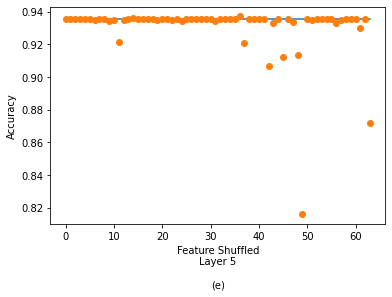

In [ ]:
U = feature_importance(5, 64)

plt.plot(U[2],U[0])
plt.plot(U[2],U[1],'o')
plt.xlabel("Feature Shuffled\nLayer 5\n\n(e)")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
Y = pd.read_csv(data_loc + "labels.csv")
X = pd.read_csv(data_loc + "L1_FeatureMap_avg.csv")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

(1413, 16)

In [ ]:
X_test.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1210,0.303200,0.400460,0.353764,0.707217,0.533821,0.554227,0.428723,0.778794,0.323104,0.810889,0.284365,0.796774,0.836172,0.388420,0.323479,0.731074
1729,0.146643,0.195819,0.169966,0.470874,0.481019,0.363911,0.160084,0.619480,0.149485,0.637665,0.136457,0.628732,0.620068,0.305004,0.199749,0.498512
3915,0.466388,0.485813,0.449157,0.440560,0.535972,0.456580,0.485114,0.433317,0.461106,0.457129,0.449703,0.503243,0.457470,0.494212,0.483417,0.425426
3721,0.012420,0.041204,0.020918,0.824176,0.205956,0.342645,0.029177,1.342032,0.015515,1.302756,0.012346,1.219387,1.130487,0.034968,0.011131,1.026077
2254,0.411256,0.346443,0.391782,0.246566,0.288678,0.196213,0.351632,0.228466,0.386406,0.239167,0.416643,0.244203,0.250285,0.374155,0.396019,0.225064
291,0.148701,0.201980,0.155307,0.449750,0.514546,0.309748,0.183528,0.493139,0.141695,0.500151,0.142030,0.461066,0.536522,0.372746,0.221724,0.455672
3603,0.443617,0.509787,0.438769,0.533369,0.426184,0.538778,0.569878,0.448095,0.454285,0.415010,0.409244,0.449446,0.406299,0.525905,0.491279,0.531605
4241,0.285216,0.308525,0.278218,0.570640,0.365735,0.387997,0.353304,0.565677,0.269499,0.565591,0.268421,0.547767,0.581013,0.391910,0.324290,0.581490
2594,0.609264,0.664959,0.643558,0.296757,0.328454,0.524801,0.637971,0.206732,0.649492,0.197278,0.609851,0.254455,0.235002,0.449922,0.567095,0.283179
960,0.399742,0.463447,0.432027,0.387361,0.389568,0.403878,0.445278,0.300430,0.426323,0.321976,0.392857,0.338216,0.378956,0.388692,0.413519,0.352694


In [ ]:
X_shuffled = X_test.copy()
shuffled = X_test['0'].values.copy()
np.random.shuffle(shuffled)
X_shuffled['0'] = shuffled

In [ ]:
X_shuffled.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1210,0.133383,0.400460,0.353764,0.707217,0.533821,0.554227,0.428723,0.778794,0.323104,0.810889,0.284365,0.796774,0.836172,0.388420,0.323479,0.731074
1729,0.398259,0.195819,0.169966,0.470874,0.481019,0.363911,0.160084,0.619480,0.149485,0.637665,0.136457,0.628732,0.620068,0.305004,0.199749,0.498512
3915,0.615665,0.485813,0.449157,0.440560,0.535972,0.456580,0.485114,0.433317,0.461106,0.457129,0.449703,0.503243,0.457470,0.494212,0.483417,0.425426
3721,0.363313,0.041204,0.020918,0.824176,0.205956,0.342645,0.029177,1.342032,0.015515,1.302756,0.012346,1.219387,1.130487,0.034968,0.011131,1.026077
2254,0.537344,0.346443,0.391782,0.246566,0.288678,0.196213,0.351632,0.228466,0.386406,0.239167,0.416643,0.244203,0.250285,0.374155,0.396019,0.225064
291,0.504179,0.201980,0.155307,0.449750,0.514546,0.309748,0.183528,0.493139,0.141695,0.500151,0.142030,0.461066,0.536522,0.372746,0.221724,0.455672
3603,0.727334,0.509787,0.438769,0.533369,0.426184,0.538778,0.569878,0.448095,0.454285,0.415010,0.409244,0.449446,0.406299,0.525905,0.491279,0.531605
4241,0.309231,0.308525,0.278218,0.570640,0.365735,0.387997,0.353304,0.565677,0.269499,0.565591,0.268421,0.547767,0.581013,0.391910,0.324290,0.581490
2594,0.513274,0.664959,0.643558,0.296757,0.328454,0.524801,0.637971,0.206732,0.649492,0.197278,0.609851,0.254455,0.235002,0.449922,0.567095,0.283179
960,1.064963,0.463447,0.432027,0.387361,0.389568,0.403878,0.445278,0.300430,0.426323,0.321976,0.392857,0.338216,0.378956,0.388692,0.413519,0.352694
